# Materialien zu <i>agla</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Reguläre Vielecke
### in der Ebene und in der $\,\mathit{xy}$ - Ebene des Raumes
<br>

In [1]:
%run agla/start

### Bereitstellen einer Funktion

Die Eckpunkte eines *n*-Ecks werden durch Teilung des Einheitskreises in *n* 
<br>gleiche Teile gewonnen. Zum Erreichen gleicher Seitenlängen <i>a</i> werden alle 
<br>Eckpunkte mit dem Streckzentrum im Ursprung und einem Streckfaktor, der von der 
<br>Anzahl der Ecken undf von <i>a</i> abhängt, gestreckt

Die folgende Funktion stellt ein solches Vieleck bereit, wobei der Streckfaktor <br>mit dem 
Standardwert 1 belegt ist. Das bedeutet, dass alle Eckpunkte auf dem <br>Einheitskreis liegen

Die Funktion ist analog zu den fest in *agla* implementierten Funktionen und Methoden<br>
gestaltet und stellt auch Hilfeinformationen bereit

Die Ableitung der Formel für den Streckfaktor erfolgt am Ende des Notebooks
<br><br>

In [14]:
def viel_eck(*args, **kwargs):
    """Erzeugung eines regulären Vielecks"""    
    
    if kwargs.get('h'):
        print('\nErzeugung regulärer Vielecke\n')
        print('Ein n-Eck mit der Seitenlänge a wird durch Teilung des Einheitskreises')
        print('in n gleiche Teile und eine Streckung erzeugt\n')
        print(' Aufruf   viel_eck( n, /[a] )')   
        print('                    n   Anzahl der Ecken')
        print('                    a   vorgegebene Seitenlänge; Zahl > 0')   
        print('                        keine Streckung, falls weggelassen\n')
        print('Zusatz    r3=ja   Erzeugung in der xy-Ebene des Raumes')
        print('          h=1     Hilfe\n')
        return

    raum = kwargs.get('r3')
    if len(args) == 1:
        n = sympify(args[0])
        f = 1
    elif len(args) == 2:
        n, a = sympify(args[0]), sympify(args[1])
    else:
        print('ein oder zwei Argumente angeben')
        return
    if not (type(n) is Integer and n > 2):
        print('für n eine ganze Zahl > 2 angeben')
        return
    if len(args) == 2:
        if not(a.is_number and a > 0):
            print('für die Seitenlänge eine Zahl > 0 angeben')
            return
        f = a / (2*sin(pi/n))   # Streckfaktor
    ek = EinhKreis2
    if raum:
        ek = EinhKreis
    ecken = [f * ek.pkt(i/n*360) for i in range(n)]
    kanten = [[i, i+1] for i in range(n-1)] + [[n-1, 0]]
    if not raum:
        return Figur(ecken, kanten)
    else:
        return Koerper(ecken, kanten)

In [15]:
ve1 = viel_eck(4)
ve2 = viel_eck(4, 5)
ve3 = viel_eck(7, Rational(11, 3))
ve4 = viel_eck(6, sqrt(7))
ve5 = viel_eck(6, sqrt(7), r3=ja)

### Gebrauch der Funktion

In [16]:
viel_eck(h=1)


Erzeugung regulaerer Vielecke

Ein n-Eck mit der Seitenlaenge a wird durch Teilung des Einheitskreises
in n gleiche Teile und eine Streckung erzeugt

 Aufruf   viel_eck( n, /[a] )
                    n   Anzahl der Ecken
                    a   vorgegebene Seitenlaenge; Zahl > 0
                        keine Streckung, falls weggelassen

Zusatz    r3=ja   Erzeugung in der xy-Ebene des Raumes
          h=1     Hilfe



### Überprüfung der Seitenlängen

In [17]:
def  länge(ve):
    return Abstand(ve.ecken[0], ve.ecken[1])

In [18]:
länge(ve1)

√2

In [19]:
länge(ve2)

5

In [20]:
länge(ve3), länge(ve3).n()

⎛        _____________________________________________________________        
⎜       ╱          ⎛2⋅π⎞          2⎛2⋅π⎞          2⎛2⋅π⎞                      
⎜      ╱    121⋅cos⎜───⎟   121⋅cos ⎜───⎟   121⋅sin ⎜───⎟                      
⎜     ╱            ⎝ 7 ⎠           ⎝ 7 ⎠           ⎝ 7 ⎠      121             
⎜    ╱    - ──────────── + ───────────── + ───────────── + ────────── , 3.6666
⎜   ╱              2⎛π⎞            2⎛π⎞            2⎛π⎞          2⎛π⎞         
⎜  ╱         18⋅sin ⎜─⎟      36⋅sin ⎜─⎟      36⋅sin ⎜─⎟    36⋅sin ⎜─⎟         
⎝╲╱                 ⎝7⎠             ⎝7⎠             ⎝7⎠           ⎝7⎠         

          ⎞
          ⎟
          ⎟
          ⎟
6666666667⎟
          ⎟
          ⎟
          ⎠

In [21]:
einfach(länge(ve3).n(), num=ja)

11/3

In [22]:
länge(ve4)

√7

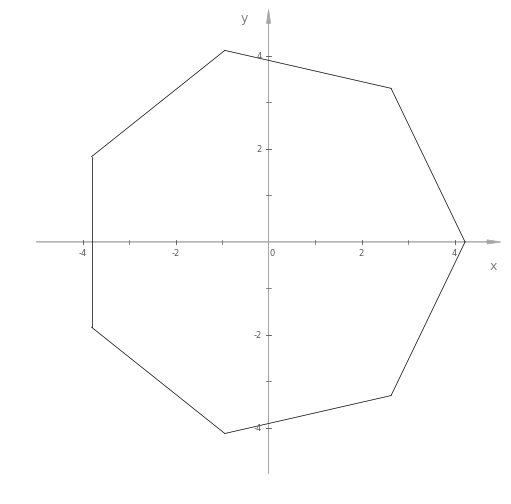

In [23]:
sicht_box(5)
zeichne(ve3)

In [24]:
zeichne(ve5)   # im Raum

<br>
### Ableitung der Formel für den Streckfaktor

In [25]:
ek = EinhKreis2

In [26]:
gl = Abstand(f*ek.pkt(0/n * 360), f*ek.pkt(1/n * 360)) - a

In [27]:
L = löse(gl, f); L

⎡⎧            _________ ⎫  ⎧           _________⎫⎤
⎢⎪           ╱    1     ⎪  ⎪          ╱    1    ⎪⎥
⎢⎪   -a⋅    ╱  ───────  ⎪  ⎪   a⋅    ╱  ─────── ⎪⎥
⎢⎪         ╱      2⎛π⎞  ⎪  ⎪        ╱      2⎛π⎞ ⎪⎥
⎢⎨        ╱    sin ⎜─⎟  ⎬  ⎨       ╱    sin ⎜─⎟ ⎬⎥
⎢⎪      ╲╱         ⎝n⎠  ⎪  ⎪     ╲╱         ⎝n⎠ ⎪⎥
⎢⎪f: ───────────────────⎪, ⎪f: ─────────────────⎪⎥
⎢⎪            2         ⎪  ⎪           2        ⎪⎥
⎣⎩                      ⎭  ⎩                    ⎭⎦

Da das Argument der Sinusfunktion zwischen 0 und $\frac{\pi}{3}$ liegt und $\,f>0\,$ ist, <br>ist die 
Formel für $f$

In [16]:
f = a / (2*sin(pi/n)); f

   a    
────────
     ⎛π⎞
2⋅sin⎜─⎟
     ⎝n⎠